### Задача

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Считывание данных

In [36]:
import pandas as pd # импортируем библиотеку pandas

In [37]:
data = pd.read_csv('/datasets/games.csv') # считываем файл
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Таблица состоит из 11 столбцов и 16715 строк.

Каждая строчка содержит информацию об играх:
- `Name` — название игры;
- `Platform` — игровая платформа;
- `Year_of_Release` — год издания;
- `Genre` — жанр игры;
- `NA_sales` — продажи экземпляров игры в Северной Америке (в миллионах);
- `EU_sales` — продажи экземпляров игры в Европе (в миллионах);
- `JP_sales` — продажи экземпляров игры в Японии (в миллионах);
- `Other_sales` — продажи экземпляров игры в других странах (в миллионах);
- `Critic_Score` — оценка игры критиками по 100-бальной шкале;
- `User_Score` — оценка игры игроками по 10-бальной шкале;
- `Rating` — рейтинг от организации ESRB (возрастная категория).

### Подготовка данных

#### Названия столбцов

Приведем названия столбцов в нормальный вид.

In [38]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Типы данных

Оценим типы данных в таблице.

In [39]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Год выпуска нужно привести к целочисленному типу, оценку критиков и оценку игроков проверим на наличие дробной части.

In [40]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Дробной части в оценке критиков нет, приведем к целочисленному типу.

In [41]:
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В оценке игроков есть дробная часть, а также значение `tbd`, что означает отсутствие оценки (заполним пустым значением). Приведем столбец к типу `float`.

In [42]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Год выпуска приведем к типу `int`.

In [43]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.dtypes # проверка

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

### Обработка пропусков

Определим количество пропусков в данных.

In [44]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пойдем сверху-вниз. Есть пропуски в названии игр, их всего два, проще всего будет их удалить.

In [45]:
data.dropna(subset=['name'], inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Пустые значения года издания не получится заполнить нужным образом, лучше их удалить. Таких значений всего 269.

In [46]:
data.dropna(subset=['year_of_release'], inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Половина данных не содержат информацию об оценке критиков и игроков, попробуем посмотреть, с какими данными коррелируют эти столбцы. И заодно добавим столбцы с общими продажами игры на конкретной платформе и вне зависимости от платформы.

In [47]:
data['total_sales_on_platform'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data['total_sales_all_platforms'] = data.groupby('name')['total_sales_on_platform'].transform('sum')
data.corr()[['critic_score', 'user_score']]

,critic_score,user_score
year_of_release,0.011411,-0.267851
na_sales,0.240083,0.085549
eu_sales,0.221276,0.055530
jp_sales,0.153474,0.126372
other_sales,0.198410,0.056935
critic_score,1.000000,0.579671
user_score,0.579671,1.000000
total_sales_on_platform,0.245349,0.087984
total_sales_all_platforms,0.286786,-0.018643


Наибольшая корреляция наблюдается между оценками игроков и критиков, оно и понятно. Но обоих данных нет, чтобы заполнить пропуски. Заполним пропуски значениями `-1`. И посмотрим на распределение.

name                            0
platform                        0
year_of_release                 0
genre                           0
na_sales                        0
eu_sales                        0
jp_sales                        0
other_sales                     0
critic_score                    0
user_score                      0
rating                       6676
total_sales_on_platform         0
total_sales_all_platforms       0
dtype: int64

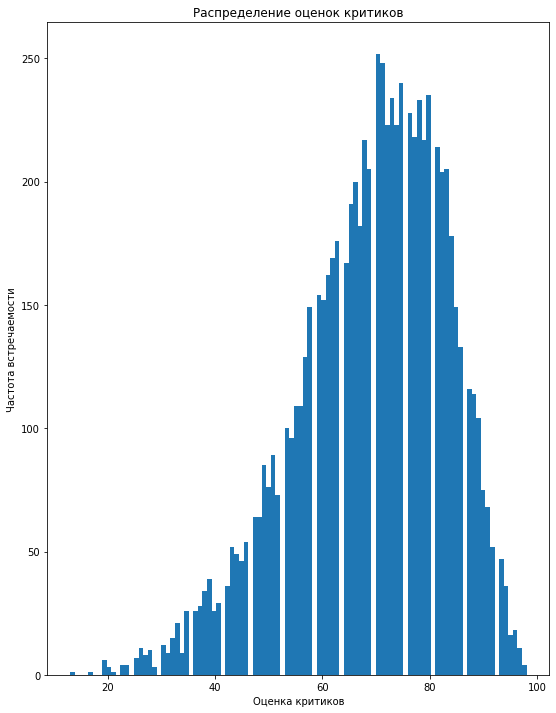

In [48]:
data['critic_score'].fillna(-1, inplace=True)
data['user_score'].fillna(-1, inplace=True)
ax = data.query('critic_score > 0')['critic_score'].plot(
    kind='hist', title='Распределение оценок критиков', bins=100, figsize=(9, 12));
ax.set_xlabel('Оценка критиков');
ax.set_ylabel('Частота встречаемости');
data.isna().sum()

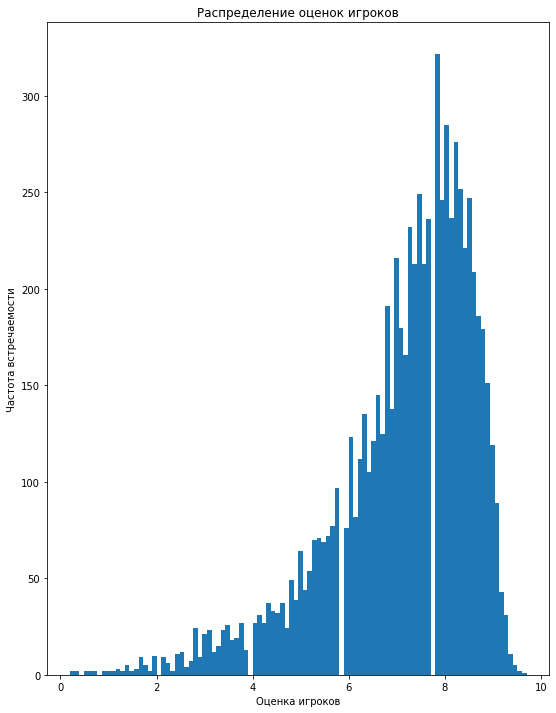

In [49]:
ax = data.query('user_score > 0')['user_score'].plot(
    kind='hist', title='Распределение оценок игроков', bins=100, figsize=(9, 12));
ax.set_xlabel('Оценка игроков');
ax.set_ylabel('Частота встречаемости');

Осталось заполнить пропуски в возрастном рейтинге. Заполним пустоты значением `unknown`.

In [50]:
data['rating'].fillna('unknown', inplace=True)
data.isna().sum()

name                         0
platform                     0
year_of_release              0
genre                        0
na_sales                     0
eu_sales                     0
jp_sales                     0
other_sales                  0
critic_score                 0
user_score                   0
rating                       0
total_sales_on_platform      0
total_sales_all_platforms    0
dtype: int64

Пропуски обработаны.

### Дубликаты

Проверим датасет на наличие полностью одинаковых строк.

In [51]:
data.duplicated().sum()

0

Дубликатов нет. Поищем игры с одинаковыми названиями и одной платформой.

In [52]:
data[['name', 'platform']].duplicated().sum()

3

Три дубликата, удалим их.

In [53]:
data = data.drop_duplicates(['name', 'platform'])

Оценим обработанные данные.

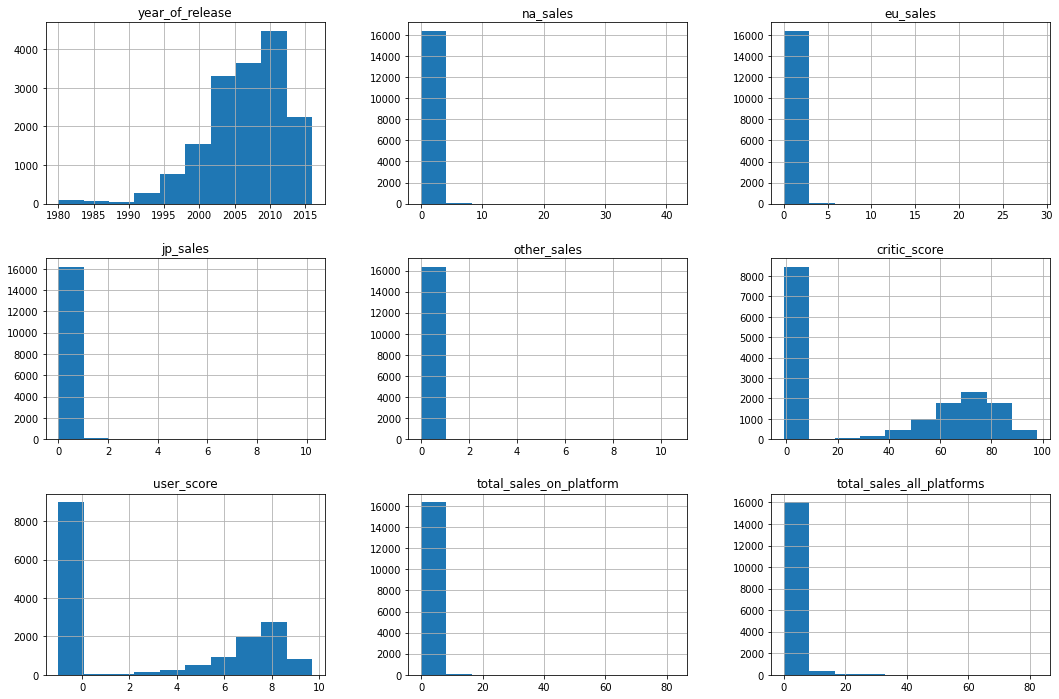

In [54]:
data.hist(figsize=(18, 12));

Можно сделать некоторые выводы:
- большая часть игр выпускалась после 1995 года, пик произовдства игр примерно в 2010 году;
- подавляющая часть игр продавалась до 10 млн экземпляров;
- пользовательская средняя оценка игр примерно 8 из 10, а критиков 75 из 100.

### Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы?

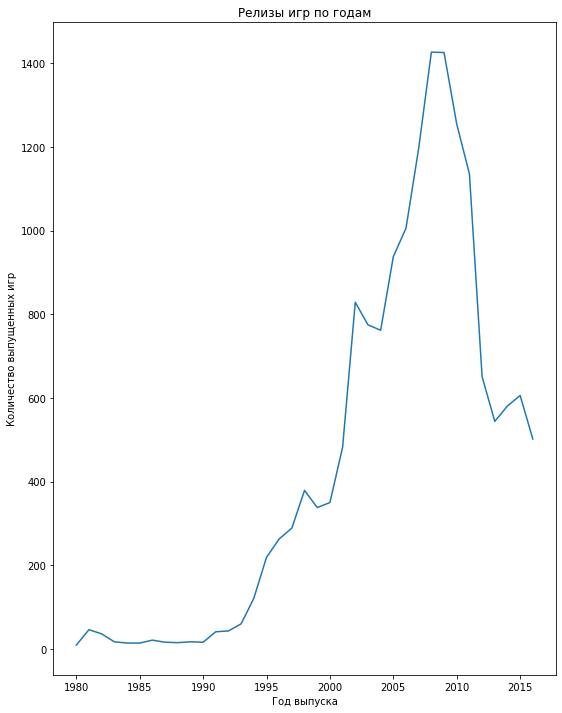

In [55]:
ax = data.pivot_table(index='year_of_release', values='genre', aggfunc='count'). \
plot(figsize=(9, 12), legend=False, title='Релизы игр по годам');
ax.set(xlabel='Год выпуска', ylabel='Количество выпущенных игр');

Количество выпускаемых игр начало расти с 1995 года. А 2009 год "золотой век" индустрии игр, далее количество игр начало сокращаться.

#### Как менялись продажи по платформам? Рассмотреть платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Посмотрим сколько всего платформ представлено в датасете.

In [56]:
data['platform'].value_counts().count()

31

Всего 31 игровая платформа. Посмотрим на суммарные продажи по платформам.

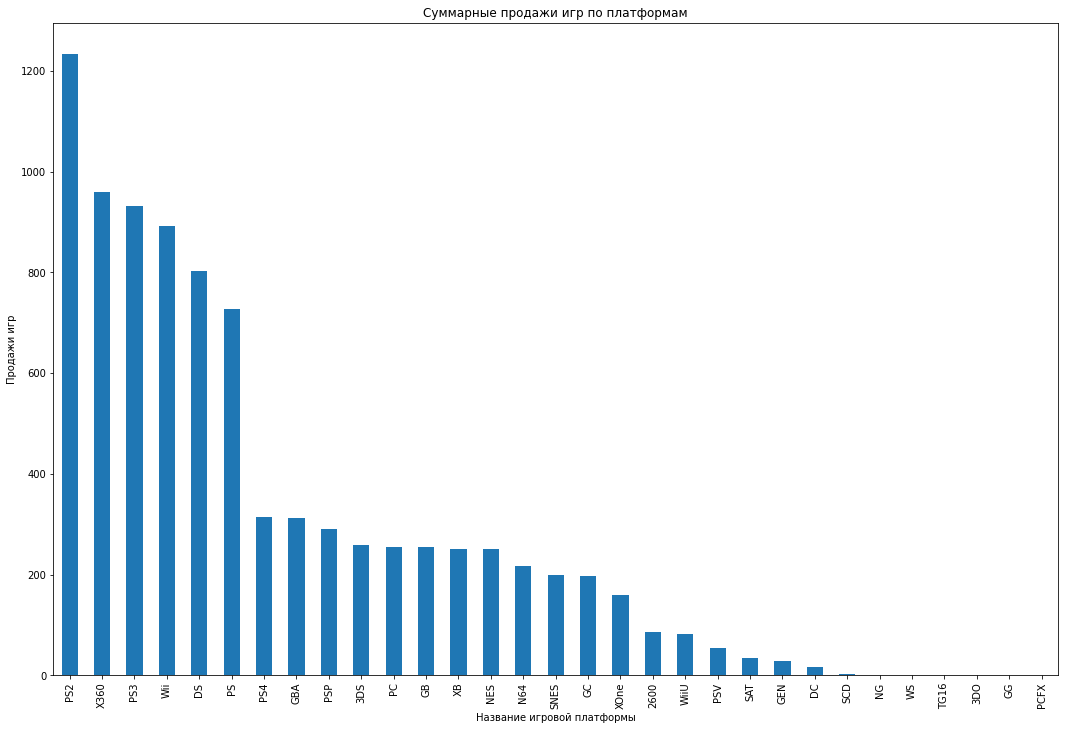

In [57]:
top_platforms = data.pivot_table(index='platform', values='total_sales_on_platform', aggfunc='sum') \
.sort_values(by='total_sales_on_platform', ascending=False)
ax = top_platforms.plot(kind='bar', figsize=(18, 12), legend=False, title='Суммарные продажи игр по платформам');
ax.set(xlabel='Название игровой платформы', ylabel='Продажи игр');

Есть явные лидеры по продажам, среди них: PS2 (PlayStation 2), X360 (XBox 360), PS3 (PlayStation 3), Wii (Nintendo Wii), DS (Nintendo DS), PS (PlayStation 1). Каким образом персональный компьютер оказался на 11 месте, совсем неясно.

Посмотрим на распределение продаж по годам у этих платформ.

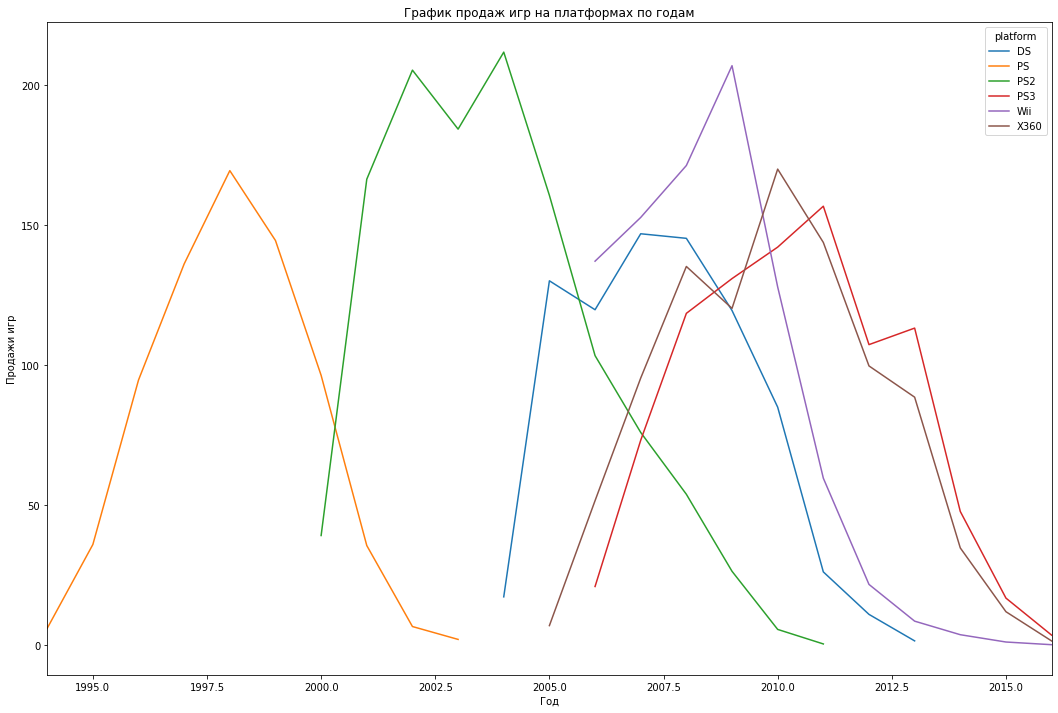

In [58]:
top_platforms_list = top_platforms.reset_index().loc[:5, 'platform'].to_list() # создаем список из платформ с лучшими продажами
top_platforms_data = data.query('platform.isin(@top_platforms_list)') # выделяем отдельный датафрейм из этих платформ
ax = top_platforms_data.pivot_table(index='year_of_release', columns='platform', values='total_sales_on_platform', aggfunc='sum') \
.plot(figsize=(18, 12), xlim=(1994, 2016), title='График продаж игр на платформах по годам');
ax.set(xlabel='Год', ylabel='Продажи игр');

Исходя из графика видно, что спрос на платформу "живет" примерно 10 лет. Можно отметить отдельно графики PS3 и X360 — это консоли одного поколения и их графики по сути повторяют друг друга.

#### Выявление актуального периода

Так как необходимо спрогнозировать спрос на 2017 год, то необходимо понять, какие данные стоит использовать для прогноза.

Посмотрим первые упоминания о платформах, в каком году они были.

In [59]:
platforms_year_of_release = data.pivot_table(index='platform', values='year_of_release', aggfunc='min') \
.sort_values(by='year_of_release', ascending=False).reset_index()
platforms_year_of_release

,platform,year_of_release
0,XOne,2013
1,PS4,2013
2,WiiU,2012
3,3DS,2011
4,PSV,2011
5,PS3,2006
6,Wii,2006
7,X360,2005
8,PSP,2004
9,GC,2001


Брать в расчет платформы, младше 2013 года нет смысла, т.к. для них игры уже вряд ли будут разрабатывать, кроме `PC`. Возьмем актуальный период для платформ, выпускавшихся с 2013 года.

In [60]:
# создаем список актуальных платформ
actual_data = data.query('year_of_release >= 2013')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_on_platform,total_sales_all_platforms
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,56.58
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,56.58
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63,25.67
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,56.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01,0.05
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01,0.01


Получился датафрейм размером 2233 строк.

Посмотрим на продажи игр для этих платформ.

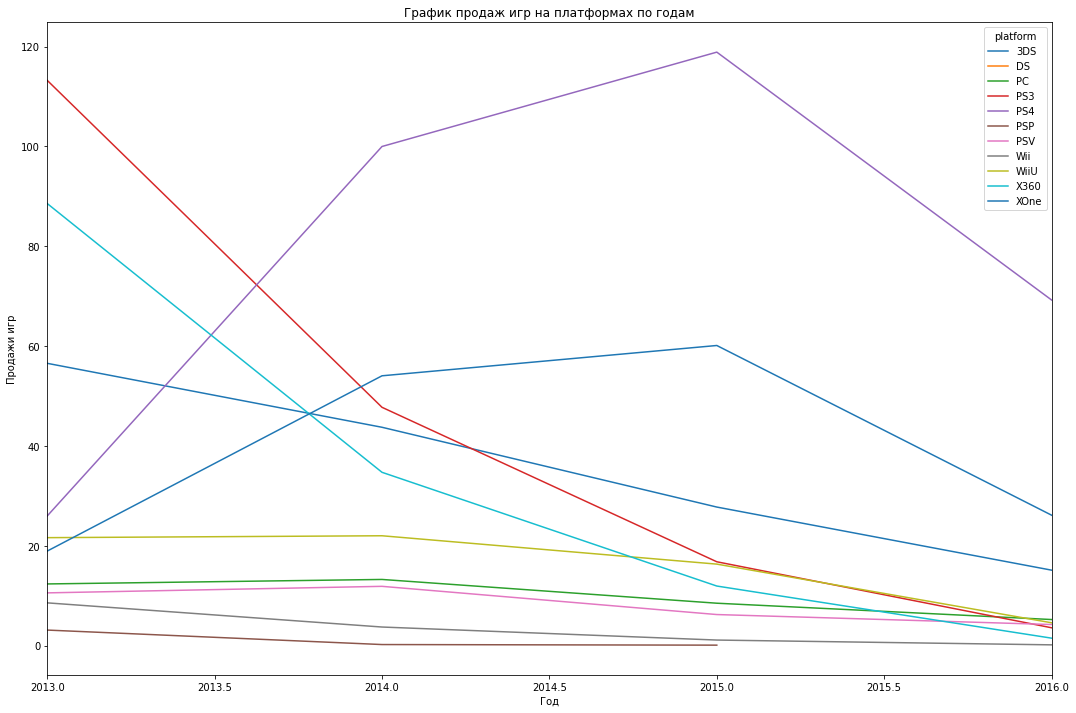

In [61]:
ax = actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales_on_platform', aggfunc='sum'). \
plot(figsize=(18, 12), xlim=(2013, 2016), title='График продаж игр на платформах по годам');
ax.set(xlabel='Год', ylabel='Продажи игр');

Спрос на все платформы находится в фазе падения. Хороший спрос пока сохраняется у консолей PlayStation 4, XBox One.

Посмотрим на продажи игр на коробчатой диаграмме по каждой популярной платформе.

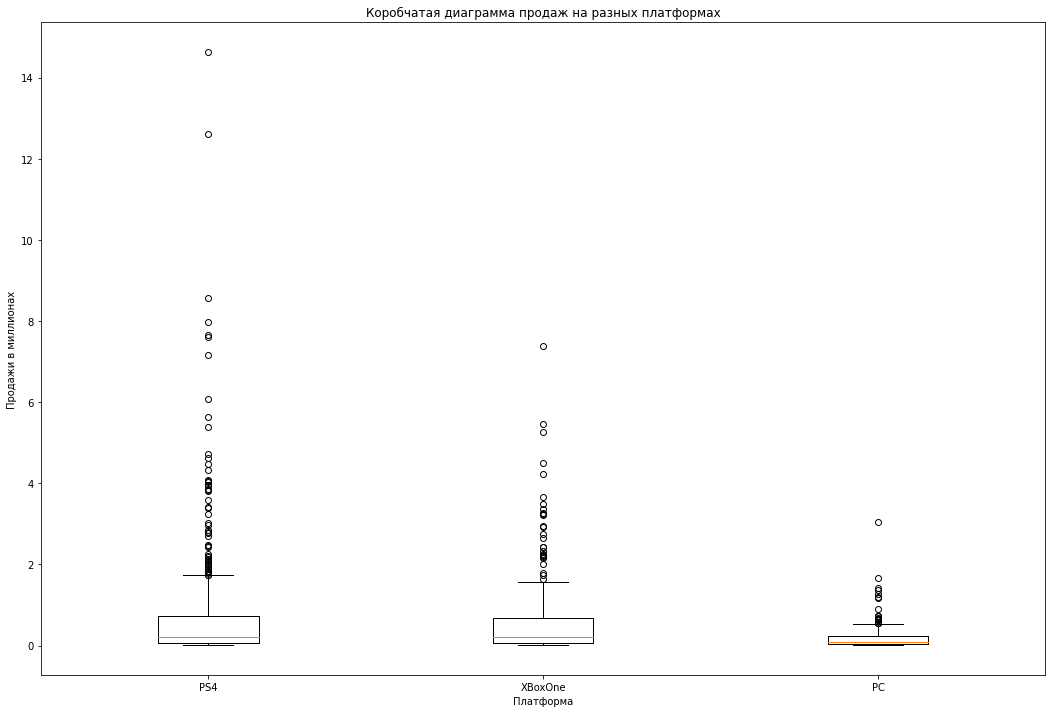

In [62]:
import matplotlib.pyplot as plt # импортируем библиотеку для визуализации

fig, ax = plt.subplots(figsize=(18, 12))
ps4_data = actual_data.query('platform == "PS4"') # собираем данные по платформе "PS4"
xone_data = actual_data.query('platform == "XOne"') # собираем данные по платформе "PS4"
pc_data = actual_data.query('platform == "PC"') # собираем данные по платформе "PS4"

ax.boxplot([ps4_data['total_sales_on_platform'], xone_data['total_sales_on_platform'], pc_data['total_sales_on_platform']])
ax.set(
    xticklabels=['PS4', 'XBoxOne', 'PC'], 
    ylabel='Продажи в миллионах', 
    xlabel='Платформа', 
    title='Коробчатая диаграмма продаж на разных платформах')
plt.show()

Большая часть данных находится в районе близком к нулю, посмотрим на медиану датасета.

In [63]:
actual_data['total_sales_on_platform'].median()

0.11

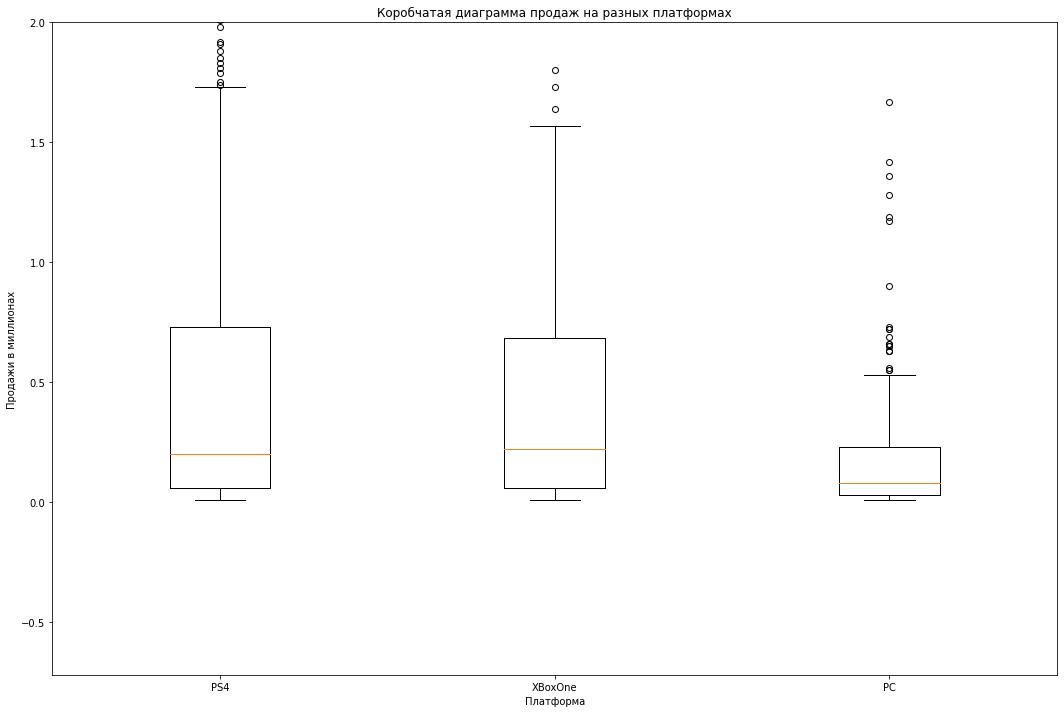

In [64]:
fig, ax = plt.subplots(figsize=(18, 12))
ps4_data = actual_data.query('platform == "PS4"') # собираем данные по платформе "PS4"
xone_data = actual_data.query('platform == "XOne"') # собираем данные по платформе "PS4"
pc_data = actual_data.query('platform == "PC"') # собираем данные по платформе "PS4"

ax.boxplot([ps4_data['total_sales_on_platform'], xone_data['total_sales_on_platform'], pc_data['total_sales_on_platform']])
ax.set(
    xticklabels=['PS4', 'XBoxOne', 'PC'], 
    ylabel='Продажи в миллионах', 
    xlabel='Платформа', 
    title='Коробчатая диаграмма продаж на разных платформах')
ax.set_ylim(ymax=2)
plt.show()

Половина игр продалась в количестве экземпляров меньше 110 тысяч. Третий квартиль примерно на уровне значения 700 тысяч. Первый квартиль — чуть выше нулевого значения.

#### Влияние отзывов игроков и критиков на продажи внутри одной популярной платформы.

Построим диаграмму рассеяния и определим влияние отзывов на продажи на платформе PS4 и найдем корреляцию.

In [65]:
ps4_data = ps4_data.query('critic_score > -1 & user_score > -1')
ps4_data[['critic_score', 'user_score', 'total_sales_on_platform']].corr()

,critic_score,user_score,total_sales_on_platform
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales_on_platform,0.405895,-0.033625,1.000000


Оценки критиков и пользователей почти не коррелируют с продажами игры. Построим диаграмму рассеяния.

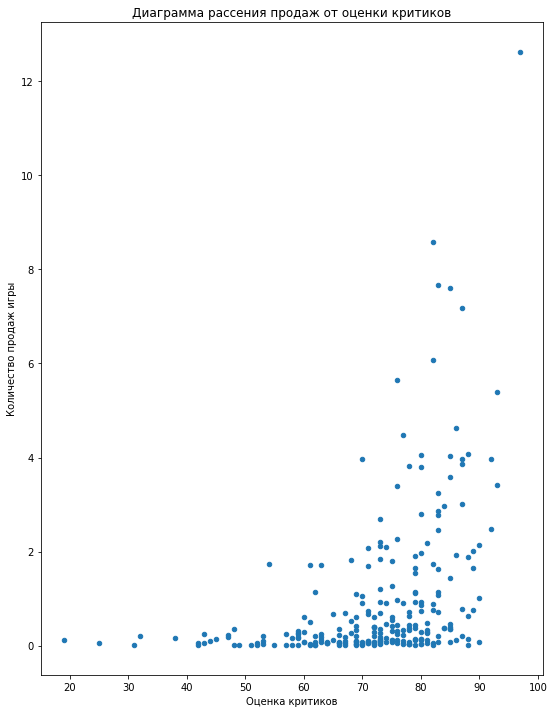

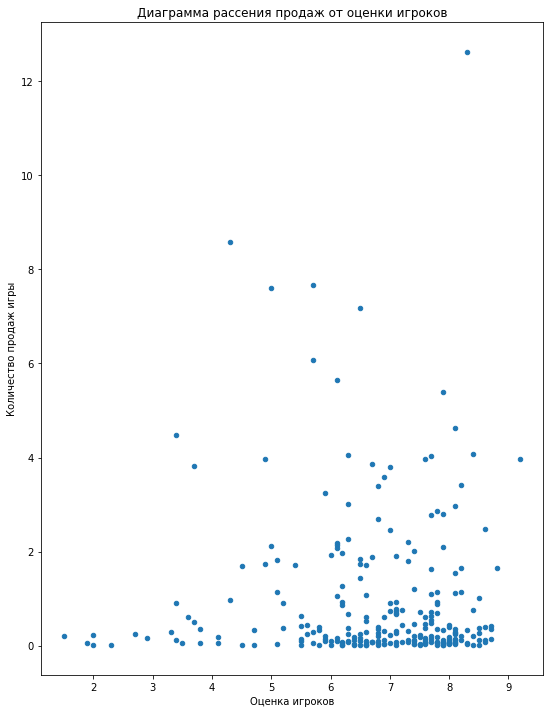

In [66]:
ax = ps4_data.plot.scatter(
    x='critic_score', y='total_sales_on_platform', figsize=(9, 12), title='Диаграмма рассения продаж от оценки критиков');
ax.set(xlabel='Оценка критиков', ylabel='Количество продаж игры');
ax = ps4_data.plot.scatter(
    x='user_score', y='total_sales_on_platform', figsize=(9, 12), title='Диаграмма рассения продаж от оценки игроков');
ax.set(xlabel='Оценка игроков', ylabel='Количество продаж игры');

На диаграмме тоже не наблюдается какой-либо корреляции. Видимо, оценки критиков и пользователей никак не влияют на продажи игр. Проверим корелляцию на других платформах, например `PC`.

In [67]:
pc_data = pc_data.query('critic_score > -1 & user_score > -1')
pc_data[['critic_score', 'user_score', 'total_sales_on_platform']].corr()

,critic_score,user_score,total_sales_on_platform
critic_score,1.000000,0.429562,0.194124
user_score,0.429562,1.000000,-0.109235
total_sales_on_platform,0.194124,-0.109235,1.000000


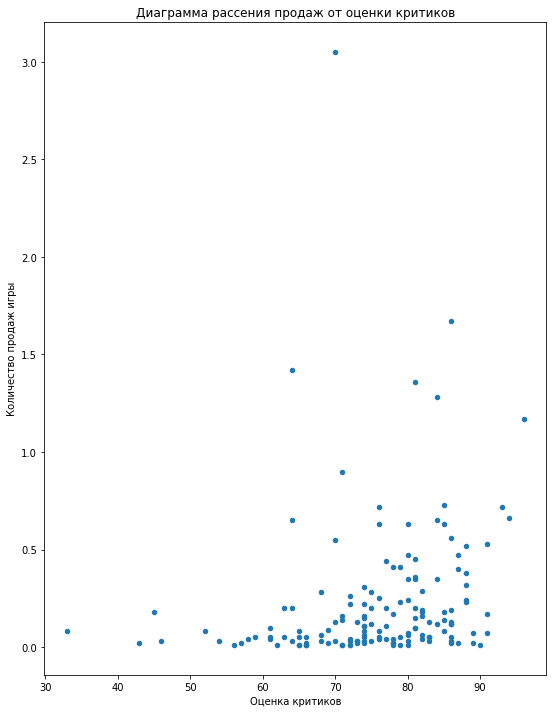

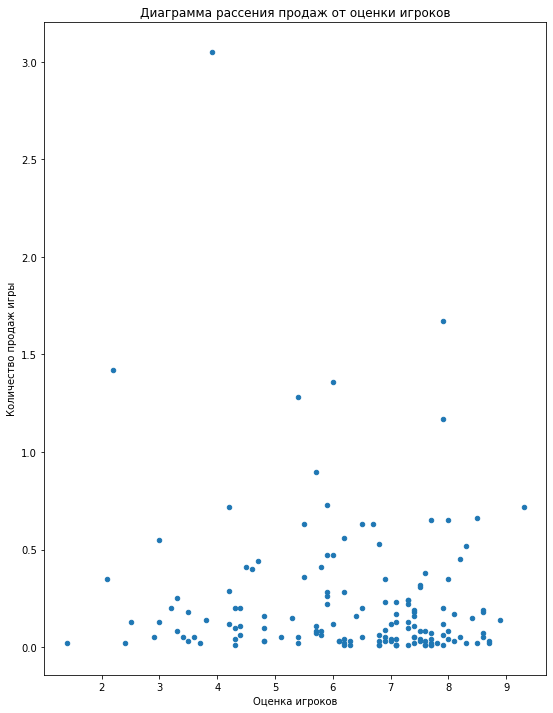

In [68]:
ax = pc_data.plot.scatter(
    x='critic_score', y='total_sales_on_platform', figsize=(9, 12), title='Диаграмма рассения продаж от оценки критиков');
ax.set(xlabel='Оценка критиков', ylabel='Количество продаж игры');
ax = pc_data.plot.scatter(
    x='user_score', y='total_sales_on_platform', figsize=(9, 12), title='Диаграмма рассения продаж от оценки игроков');
ax.set(xlabel='Оценка игроков', ylabel='Количество продаж игры');

Здесь корреляция оказалась даже меньше, проверим `XBox One`.

In [69]:
xone_data = xone_data.query('critic_score > -1 & user_score > -1')
xone_data[['critic_score', 'user_score', 'total_sales_on_platform']].corr()

,critic_score,user_score,total_sales_on_platform
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
total_sales_on_platform,0.410422,-0.094003,1.000000


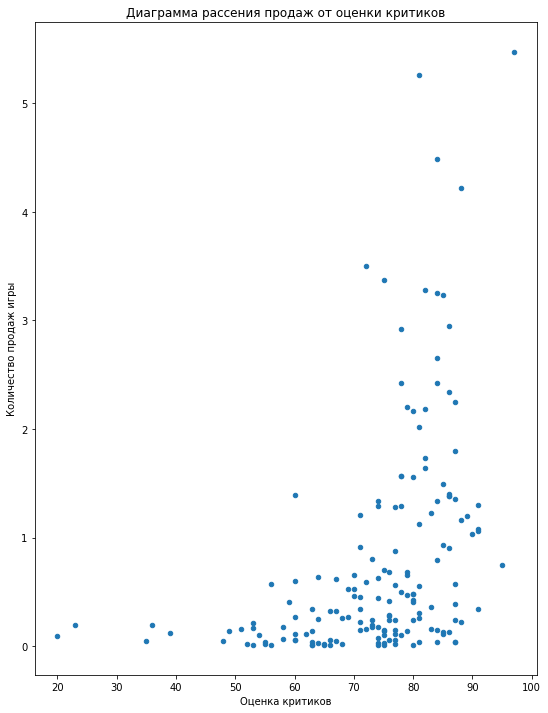

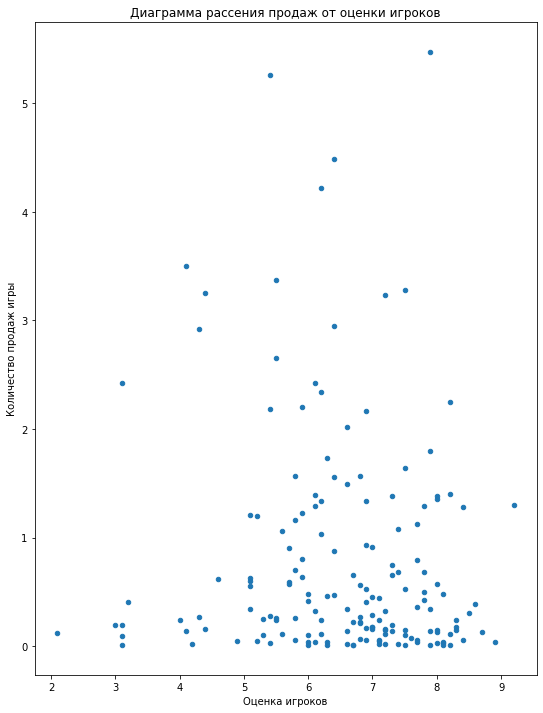

In [70]:
ax = xone_data.plot.scatter(
    x='critic_score', y='total_sales_on_platform', figsize=(9, 12), title='Диаграмма рассения продаж от оценки критиков');
ax.set(xlabel='Оценка критиков', ylabel='Количество продаж игры');
ax = xone_data.plot.scatter(
    x='user_score', y='total_sales_on_platform', figsize=(9, 12), title='Диаграмма рассения продаж от оценки игроков');
ax.set(xlabel='Оценка игроков', ylabel='Количество продаж игры');

Здесь тоже слабая корреляция

#### Распределение игр по жанрам. Самые прибыльные жанры. Продажи по жанрам.

Рассмотрим в каком количестве представлены игры по жанрам.

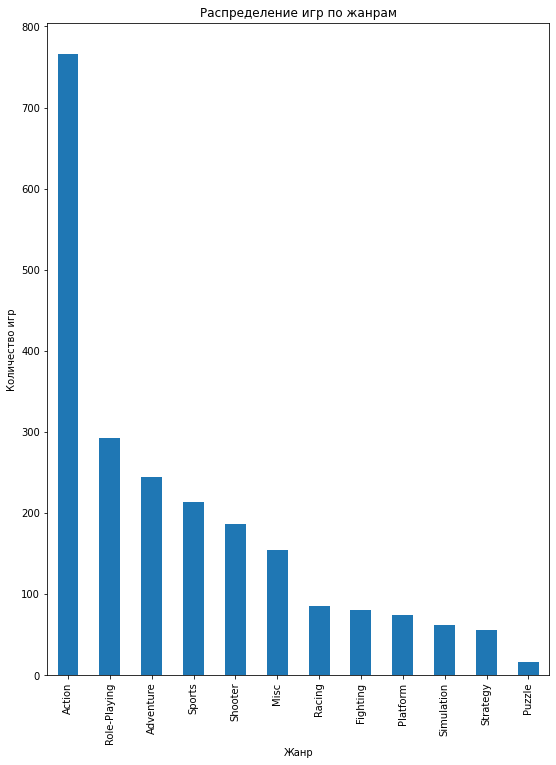

In [71]:
ax = actual_data['genre'].value_counts().plot(kind='bar', figsize=(9, 12), title='Распределение игр по жанрам');
ax.set(xlabel='Жанр', ylabel='Количество игр');

Большая часть игр выпускается в жанрах: экшн, ролевые игры, приключения, спорт, шутеры. Пазлы и стратегии почти не выпускаются.

Оценим спрос игры в зависимости от жанра.

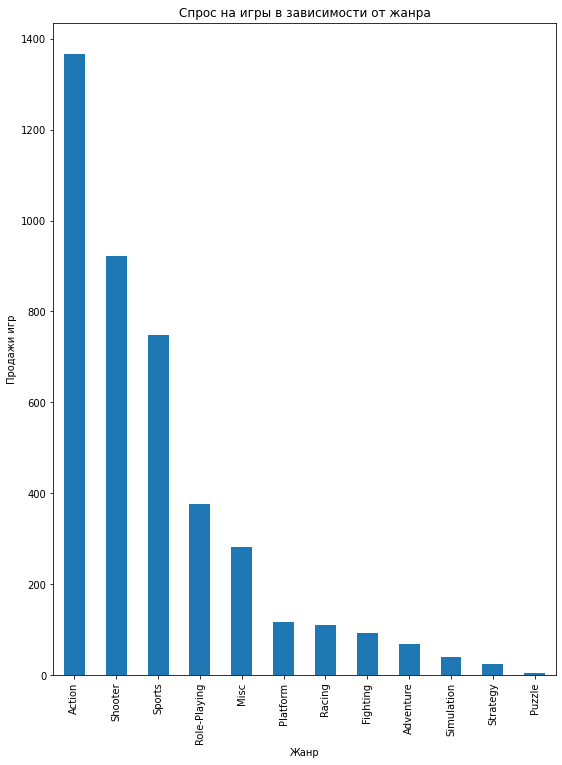

In [72]:
ax = actual_data.pivot_table(index='genre', values='total_sales_all_platforms', aggfunc='sum') \
.sort_values(by='total_sales_all_platforms', ascending=False) \
.plot(kind='bar', figsize=(9, 12), legend=False, title='Спрос на игры в зависимости от жанра');
ax.set(xlabel='Жанр', ylabel='Продажи игр');

Наибольший спрос наблюдается на игры жанров: экшн, шутеры, спорт, ролевые игры. Пазлы, как и в предыдущей диаграмме закрывают список. Попробуем оценить по среднему показателю продаж на жанр.

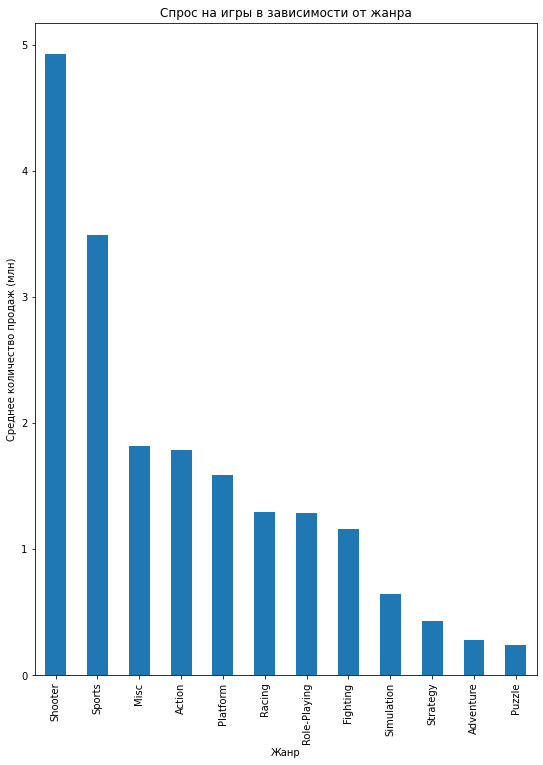

In [73]:
ax = actual_data.pivot_table(index='genre', values='total_sales_all_platforms', aggfunc='mean') \
.sort_values(by='total_sales_all_platforms', ascending=False) \
.plot(kind='bar', figsize=(9, 12), legend=False, title='Спрос на игры в зависимости от жанра');
ax.set(xlabel='Жанр', ylabel='Среднее количество продаж (млн)');

В среднем шутеры, спортивные и смешанные игры формируют топ три игр по продажам. Пазлы, как и прежде, не собираются.

### Портрет пользователя региона

#### Самые популярные платформы

Рассмотрим спрос на платформы в зависимости от региона.

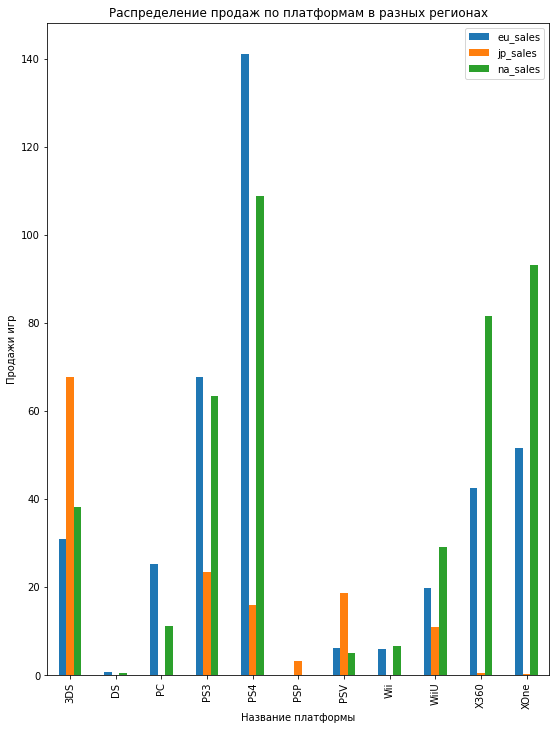

In [74]:
ax = actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') \
.plot(kind='bar', figsize=(9, 12), title='Распределение продаж по платформам в разных регионах');
ax.set(xlabel='Название платформы', ylabel='Продажи игр');

Европейские пользователи предпочитают играть на игровых консолях PS4, PS3 и XBox One. Они почти не играют в Nintendo и PSP.

Игроки из Северной Америки тоже предпочитают игровую консоль PS4, PS3, XBox One, XBox 360.

Японские пользователи почти не играют на компьютере и консолях XBox, зато больше остальных играют на приставке Nintendo 3DS и PlayStation Vita и PSP.

Короче, топ 5 для для:
- Северной Америки: PS4, XBox One, XBox 360, PS3, Nintendo 3DS.
- Европы: PS4, PS3, XBox One, XBox 360, Nintendo 3DS.
- Японии: Nintendo 3DS, PS3, PSV, PS4, Nintendo Wii U.

#### Самые популярные жанры

Оценим популярность жанров по регионам.

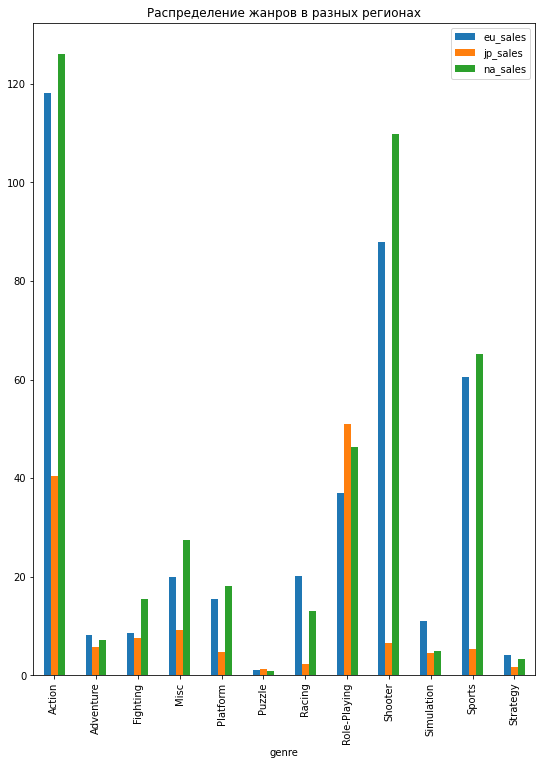

In [75]:
actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') \
.plot(kind='bar', figsize=(9, 12), title='Распределение жанров в разных регионах');

По данной диаграмме видно, что:
- ролевые игры покупают почти одинаково во всех регоинах;
- европейские и североамериканские игроки имеют схожие предпочтения;
- японские игроки предпочитают в основном экшн и ролевые игры.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Оценим влияние возрастного рейтинга на продажи.

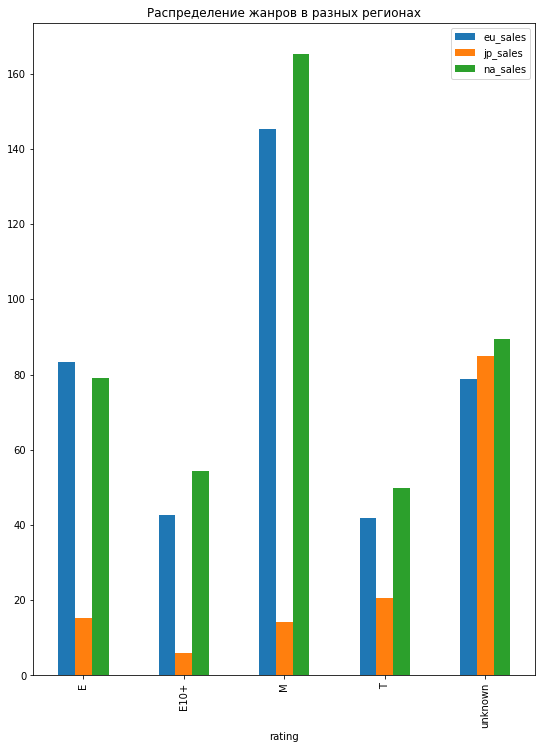

In [76]:
actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') \
.plot(kind='bar', figsize=(9, 12), title='Распределение жанров в разных регионах');

Нужно пояснить, что эти рейтинги значат:
- E - игра для всех возрастов;
- E10+ - игра для детей старше 10 лет;
- EC - для детей младшего возраста;
- K-A - для всех возрастов;
- M - для возрастной категории старше 17 лет;
- RP - рейтинг ожидается;
- T - подросткам от 13 до 19 лет;
- unknown - нет информации о рейтинге.

В Америке и Европе чаще всего играют в игры категории `M` старше 17 лет и в остальных рейтингах показывают схожее предпочтение. Японские игроки в большинстве своем играют в игры с неизвестным рейтингом.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ XBox One и PC одинаковые?

Проверим двустороннюю гипотезу.
- Нулевая гипотеза: средние пользовательские рейтинги платформ XBox One и PC одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги платформ XBox One и PC неодинаковые.

In [77]:
from scipy import stats as st # импортируем библиотеку stats

xbox_one_user_scores = actual_data.query('platform == "XOne"')['user_score']
pc_user_scores = actual_data.query('platform == "PC"')['user_score']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(
    xbox_one_user_scores, 
    pc_user_scores)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.20111399900783597
Не отвергаем нулевую гипотезу


**`Нулевая гипотеза не отвергнута, нет оснований утверждать, что пользовательские оценки платформ XBox One и PC разные.`**

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

Проверим двустороннюю гипотезу.
- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports неодинаковые.

In [78]:
action_user_scores = actual_data.query('genre == "Action"')['user_score']
sports_user_scores = actual_data.query('genre == "Sports"')['user_score']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(
    action_user_scores, 
    sports_user_scores)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.02193663336455412
Отвергаем нулевую гипотезу


**`Нулевая гипотеза отвергнута, нет оснований утверждать, что пользовательские рейтинги жанров Action и Sports одинаковы.`**

### Общий вывод

В данной работе рассматривался набор данных о продажах игр в разных уголках мира. В данных была представлена информация о названиях игр, годе выпуска, жанрах, игровой платформе, продажах в различных регионах мира, возрастном рейтинге.

Требовалось определить, какие закономерности определяют успешность игры.

Во время работы в датасете были приведены типы данных, заполнены пропуски, проверены дубликаты.

В исследовательском анализе были проверены некоторые закономерности:
- в 2009 году было продано больше всего экземпляров игр, до этого года продажи росли, далее начали падать;
- самые популярные игровые платформы принадлежат сериям "PlayStation", "XBox" и "Nintendo";
- средний срок актуальности игровой платформы — 10 лет;
- по состоянию на 2017 год, наиболее актуальные игровые платформы: "Nintendo 3DS", "PS4", "XBox One";
- мнение критиков и игроков почти не влияет на продажи игр;
- в среднем, чаще всего пользователи покупали игры жанров шутер и спорт;
- жители Северной Америки и Европы имеют схожие предпочтения в играх;
- американцы и европейцы чаще играют в экшн игры и шутеры;
- ролевые игры имеют примерно одинаковое количество игроков с каждого региона;
- в приставку Nintendo 3DS играют в основном японцы;
- люди в основном играют в игры с рейтингом от 17 лет или "для всех".

Проверены две гипотезы: 
- Средние пользовательские рейтинги платформ XBox One и PC одинаковые? — по, рейтинги не одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные? — гипотеза подтверждена.

Учитывая проведенный анализ, рекомендуется следующее: наибольшую выручку принесет продажа игр на игровых платформах "PS4", "XBox One", также еще сохраняется спрос на игры для "Nintendo 3DS" в Японии. Наиболее предпочтительные жанры: экшн и шутер для европейских и североамериканских пользователей, ролевые игры — для всех регионов, но особенно для Японии. Возрастной рейтинг игр должен быть от 13 лет.